#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#Data Exploring

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

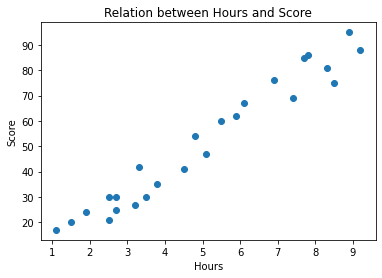

In [5]:
plt.scatter(df['Hours'],df['Scores']);
plt.title("Relation between Hours and Score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [6]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#Using Sklearn 

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.33,random_state=0)


In [8]:
print(X_train)
print(X_test)

[[1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]]


In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regresstor = LinearRegression()
regresstor.fit(X_train,Y_train)


LinearRegression()

In [10]:
#Rate of the model
regresstor.score(X_test,Y_test)  

0.9555700801388128

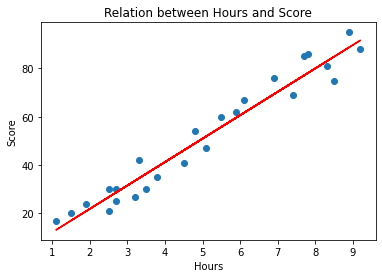

In [11]:
#Compination of predictive line and dataset
line=regresstor.coef_*X+regresstor.intercept_
plt.scatter(X,Y);
plt.plot(X,line,color="red")
plt.title("Relation between Hours and Score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [12]:
y_predict = regresstor.predict(X_test)
print(y_predict)

[17.04289179 33.51695377 74.21757747 26.73351648 59.68164043 39.33132858
 20.91914167 78.09382734 69.37226512]


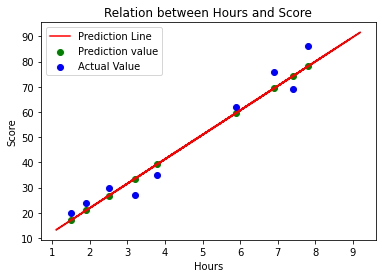

In [13]:
line=regresstor.coef_*X+regresstor.intercept_
plt.scatter(X_test,y_predict,color="green");
plt.scatter(X_test,Y_test,color="blue");
plt.plot(X,line,color="red")
plt.title("Relation between Hours and Score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.legend(["Prediction Line","Prediction value","Actual Value"])
plt.show();

#Comperation between Actual and preducted Value

In [14]:
compare =pd.DataFrame({'Actual': Y_test, 'Predicted':y_predict,'Error Rate':(abs(Y_test-y_predict)/Y_test)*100})
print(compare)

   Actual  Predicted  Error Rate
0      20  17.042892   14.785541
1      27  33.516954   24.136866
2      69  74.217577    7.561706
3      30  26.733516   10.888278
4      62  59.681640    3.739290
5      35  39.331329   12.375225
6      24  20.919142   12.836910
7      86  78.093827    9.193224
8      76  69.372265    8.720704


#Predict of 9.25 hour/day value 

In [15]:
yofprediction=np.array(9.25)
yofprediction=yofprediction.reshape(-1,1)
result = regresstor.predict(yofprediction)
print(yofprediction,result)

[[9.25]] [92.14523315]
